In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Layer, Dense, Flatten
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import Sequential
from glob import glob

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [3]:
IMAGE_INPUT = [224, 224]
test_path = '../../../DATASETS/Cotton_disease/test/'
train_path = '../../../DATASETS/Cotton_disease/train/'

In [4]:
vgg19_model = VGG16 (include_top=False, weights='imagenet', input_shape=IMAGE_INPUT + [3])

In [5]:
for layer in vgg19_model.layers:
    layer.trainable = False

In [6]:
folder = glob (train_path + '/*')

In [7]:
len (folder)

2

In [8]:
x = Flatten()(vgg19_model.output)

In [9]:
pred = Dense (units = len(folder), activation = 'softmax')(x)

In [10]:
model = Model(inputs = vgg19_model.input, outputs = pred)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
model.compile (loss='categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_set = train_datagen.flow_from_directory(train_path, target_size= (224, 224), class_mode='categorical', batch_size=32)

Found 2637 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory(test_path, target_size=(224, 224), class_mode='categorical', batch_size=32)

Found 660 images belonging to 2 classes.


In [16]:
hist = model.fit(train_set, validation_data=test_set, epochs=10, steps_per_epoch = len(train_set), validation_steps=len(test_set))

C:\Users\91907\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
83/83 [==============================] - 327s 3s/step - loss: 0.6169 - accuracy: 0.7331 - val_loss: 0.3824 - val_accuracy: 0.8318
Epoch 2/10
83/83 [==============================] - 181s 2s/step - loss: 0.3884 - accuracy: 0.8267 - val_loss: 0.4237 - val_accuracy: 0.7955
Epoch 3/10
83/83 [==============================] - 190s 2s/step - loss: 0.3709 - accuracy: 0.8457 - val_loss: 0.3279 - val_accuracy: 0.8591
Epoch 4/10
83/83 [==============================] - 116s 1s/step - loss: 0.3180 - accuracy: 0.8522 - val_loss: 0.3627 - val_accuracy: 0.8530
Epoch 5/10
83/83 [==============================] - 107s 1s/step - loss: 0.3153 - accuracy: 0.8651 - val_loss: 0.4083 - val_accuracy: 0.8288
Epoch 6/10
83/83 [==============================] - 104s 1s/step - loss: 0.2833 - accuracy: 0.8697 - val_loss: 0.3445 - val_accuracy: 0.8591
Epoch 7/10
83/83 [==============================] - 85s 1s/step - loss: 0.2743 - accuracy: 0.8878 - val_loss: 0.4065 - val_accuracy: 0.8182
Epoch 8/10
83/

In [17]:
def plotter (hist, metric):
    plt.plot (hist.history[metric])
    plt.plot (hist.history['val_'+ metric])
    plt.xlabel ('epochs')
    plt.ylabel ('metric')
    plt.legend (metric + 'val_' + metric)

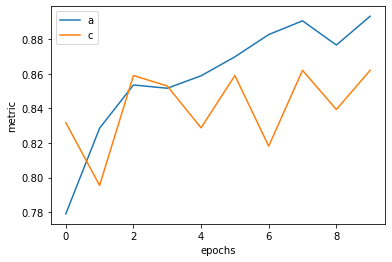

In [18]:
plotter (hist=hist, metric='accuracy')

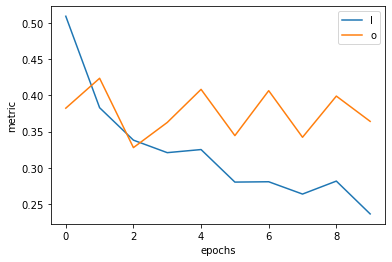

In [19]:
plotter (hist=hist, metric = 'loss')